In [1]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm

# Funkcja odczytująca eventy

In [2]:
from ezc3d import c3d
import numpy as np

def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = np.around(c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]*1000)
    
    return [event, time]

# Funkcja zwracająca momenty rozpoczęcia i zakończenia eventów

In [3]:
import data_procesing as dp
import numpy as np
import importlib


def read_events(data_path):
    importlib.reload(dp)
    eventy = dp.read_labels(data_path,1000)

    eventy[0].index('Foot Strike')


    indxE = [i for i, x in enumerate(eventy[0]) if x == "Event"]
    indxFS = [i for i, x in enumerate(eventy[0]) if x == "Foot Strike"]


    CzasFS = np.zeros(len(indxFS))
    for i in range(len(indxFS)):
        CzasFS[i] = eventy[1][indxFS[i]]

    CzasE = np.zeros(len(indxE))
    for i in range(len(indxE)):
        CzasE[i] = eventy[1][indxE[i]]
    eventy[1].sort()


    p=np.zeros(10)
    d=np.zeros(10)
    j=0
    for i in range(len(eventy[1])):
        if not i >= len(eventy[1])-2:
            pierwszy = eventy[1][i]
            drugi = eventy[1][i+1]
            trzeci = eventy[1][i+2]
            if pierwszy in CzasE:
                if drugi in CzasFS:
                    if trzeci in CzasE:
                        p[j]=pierwszy
                        d[j]=trzeci
                        j+=1
    p=p.astype(int)
    d=d.astype(int)
    
    return[p,d]

In [4]:
path=r"C:\Users\gmultimedia.PJATK8\Desktop\PJATK_K\2020-08-05-B0444-S01-E02-T04.c3d"

In [5]:
read_labels(path)

[['Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike'],
 array([ 2340.,  5080.,  7390.,  9905., 12760., 15570., 17670., 20175.,
        22910., 25900., 29370.,  3695.,  6180.,  8515., 11365., 13880.,
        16550., 18795., 21615., 24280., 27980.])]

In [6]:
p,d = dp.read_labels(path, 1000)
print(p,d)

[2340, 5080, 7390, 9905, 12760, 15570, 17670, 20175, 22910, 25900] [5080, 7390, 9905, 12760, 15570, 17670, 20175, 22910, 25900, 29370]


In [7]:
import sys
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from matplotlib import scale as mscale
from pyomeca import Analogs
    
def normalize_data(data_path):

    muscles2 = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
    muscles_names = [["Czworoboczny grzbietu L"],["Trójgłowy ramienia L"], ["Dwugłowy ramienia L"], ["Prostownik nadgarstka L"],["Skośny brzucha L"], ["Pośladkowy średni L"],["Czworogłowy uda L"], ["Brzuchaty łydki L"],["Czworoboczny grzbietu P"],["Trójgłowy ramienia P"], ["Dwugłowy ramienia P"], ["Prostownik nadgarstka P"],["Skośny brzucha P"], ["Pośladkowy średni P"],["Czworogłowy uda P"], ["Brzuchaty łydki P"]]
    muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]

    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

    max_val=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

    #emg_list=[]

    #emg_processed=[[]]

    #plt.figure(figsize=(20,15))


    #for i in range(0,16): 
    #emg_processed.append([])

    #emg_norm_value=[]
    emg=Analogs.from_c3d(data_path, usecols=muscles)

    emg_p = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(ref=None, scale=1)
    )
     
    emg_p['channel'] = muscles_names2
        #subplot(4, 4, i+1)
        
        #for j in range(emg_p.shape[1]):
         #   if emg_p[0][j].values>max_val[i]:
          #      max_val[i]=emg_p[0][j].values
        #for k in range(emg_p.shape[1]):
         #   emg_norm_value.append(emg_p[0][k].values)


        #emg_processed[i].append(emg_p.time.values)
        #emg_processed[i].append(emg_norm_value)

    #return [ emg_p, emg_processed]
    return emg_p 
    

In [8]:
processed=normalize_data(path)

In [9]:
def show_emg_data(emg_processed):
    emg_processed.plot(x="time", col="channel", col_wrap=3)
    #plt.plot(emg_processed)

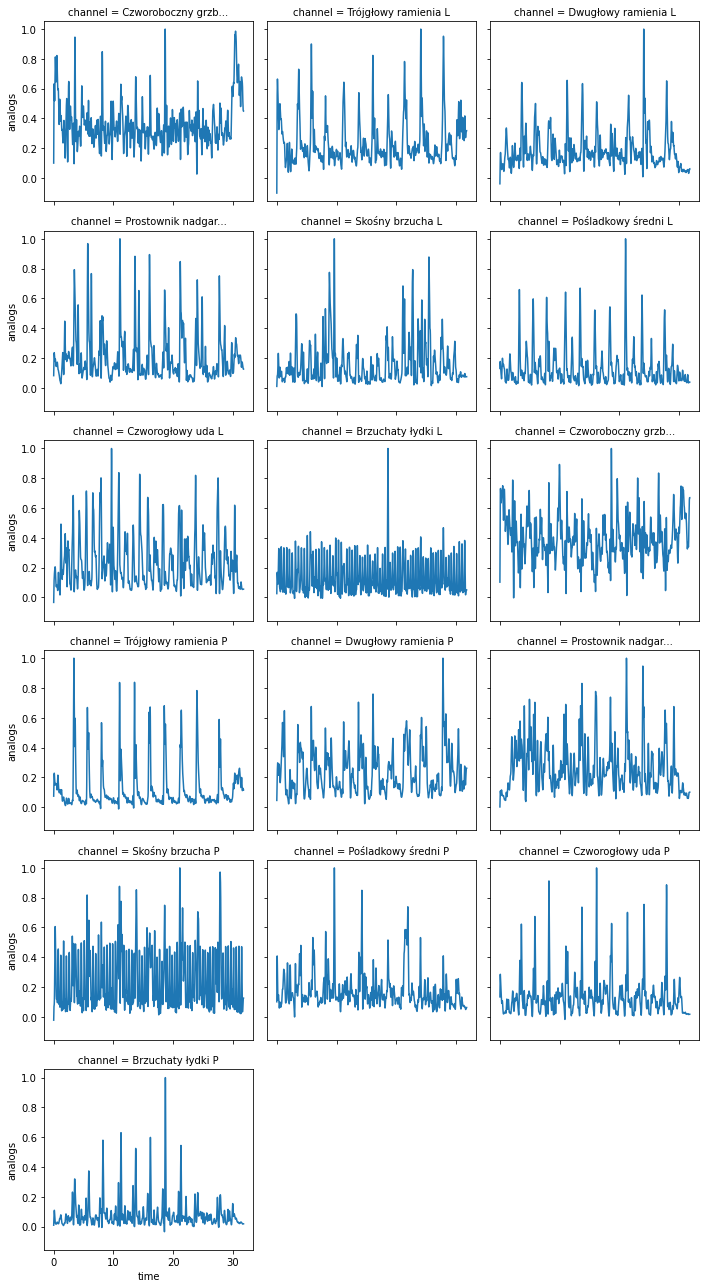

In [10]:
show_emg_data(processed)

In [11]:
def show_data(processed):
    processed.plot(x="time", col="channel", col_wrap=3)
    #print('ok')
    #plt.plot(emg_processed)
    
def load_and_show_data(data_path):
    muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]
    processed=Analogs.from_c3d(data_path, usecols=muscles)
    processed.plot(x="time", col="channel", col_wrap=3)
    

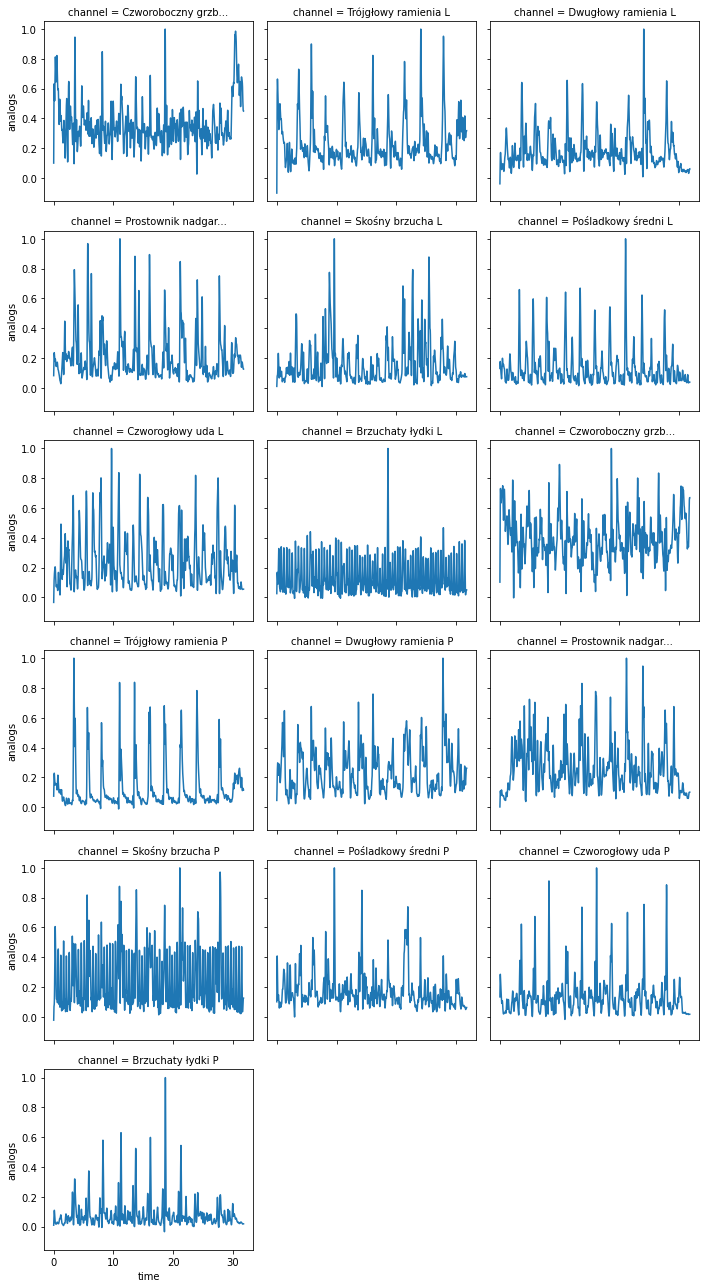

In [12]:
show_data(processed)

In [13]:
def show_events(data_path,emg_processed=None):
    if emg_processed is None:
        emg_processed=normalize_data(data_path)
    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

    p,d=dp.read_labels(data_path, 1000)
    for num in range(16):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
        for i in range(len(p)):
    
                          
            emg_processed_event=emg_processed[num][p[i]:d[i]]

            plt.plot(emg_processed_event)
            plt.title(muscles_names2[num])

        subplot(1, 2, 2)
        plt.plot(emg_processed[num])
        plt.title(muscles_names2[num])
        plt.show()
        
        
    

In [14]:
def show_events_average(data_path,emg_processed=None):
    if emg_processed is None:
        emg_processed=normalize_data(data_path)
    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

    #aver_arr=[[]]
    #for t in range(1000):
    #        aver_arr[num].append(0)
    aver_arr=np.zeros((16,1000))  
    
    
    p,d=dp.read_labels(data_path, 1000)
    for num in range(16):
        #aver_arr.append([])
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
        for i in range(len(p)):
        
                   
            emg_processed_event=emg_processed[num][p[i]:d[i]]
            emg_processed_event2 = (
            emg_processed_event.meca.normalize(scale=1)                
     )
            time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
#             plt.plot(time_normalized)     
#             plt.title(muscles_names2[num])
            for t in range(1000):
                aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]
                
        aver_arr[num]=aver_arr[num]/10
        time=np.linspace(1,1000,1000)
        plt.plot(time,aver_arr[num])     
        plt.title(muscles_names2[num])
        
        
        subplot(1, 2, 2)
        plt.plot(emg_processed[num])
        plt.title(muscles_names2[num])
        plt.show()
    #print(aver_arr)
        
        
      
        

In [15]:
def show_events_norm(data_path,emg_processed=None):
    if emg_processed is None:
        emg_processed=normalize_data(data_path)
        
    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
 
    p,d=dp.read_labels(data_path, 1000)
    for num in range(16):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
        for i in range(len(p)):
        
                   
            emg_processed_event=emg_processed[num][p[i]:d[i]]
            emg_processed_event2 = (
            emg_processed_event.meca.normalize(scale=1)                
     )
            time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
            plt.plot(time_normalized)     
            plt.title(muscles_names2[num])

        subplot(1, 2, 2)
        plt.plot(emg_processed[num])
        plt.title(muscles_names2[num])
        plt.show()
        
        
    

In [16]:
path2=r"C:\Users\gmultimedia.PJATK8\Desktop\PJATK_K\2020-08-06-B0445-S01-E02-T05.c3d"
processed2=normalize_data(path2)

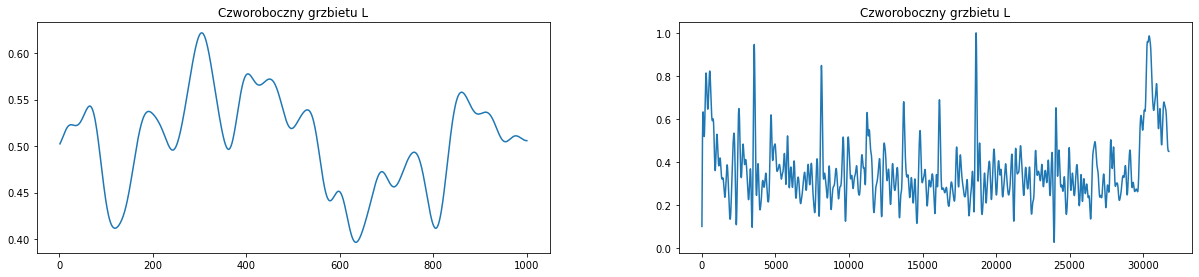

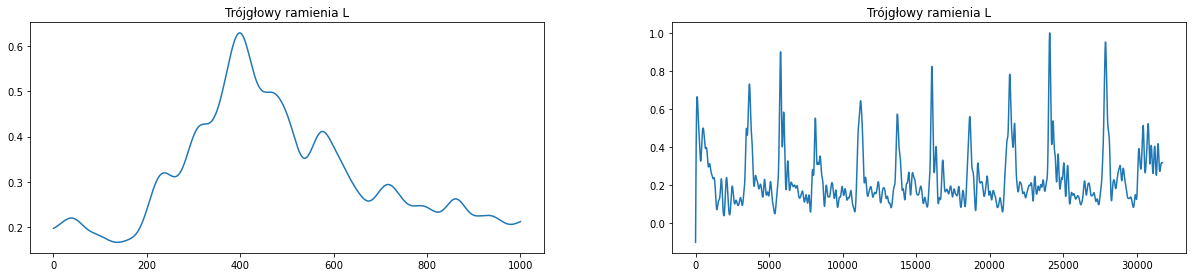

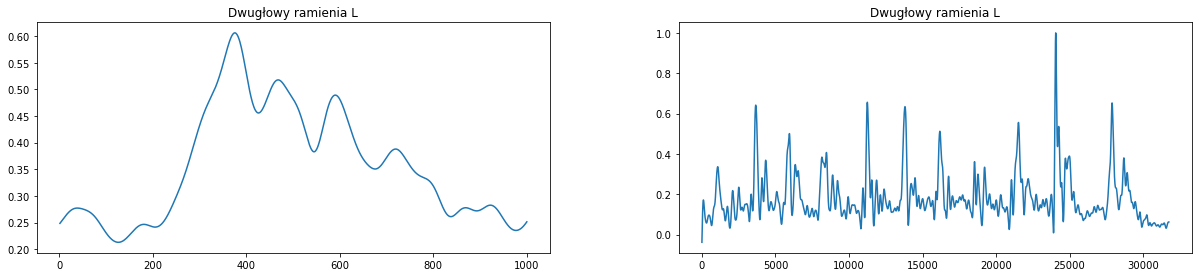

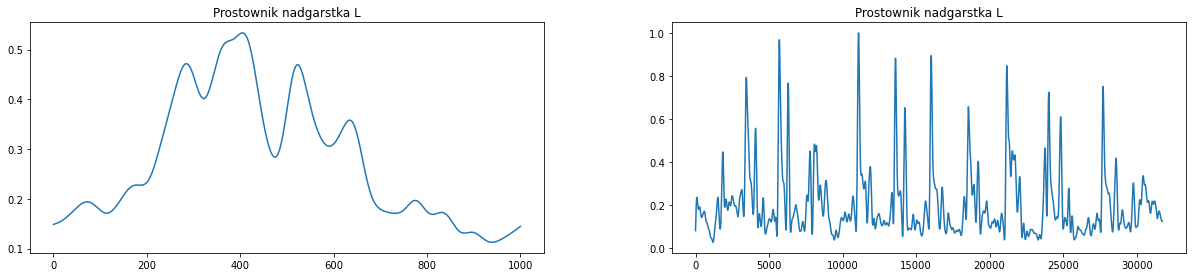

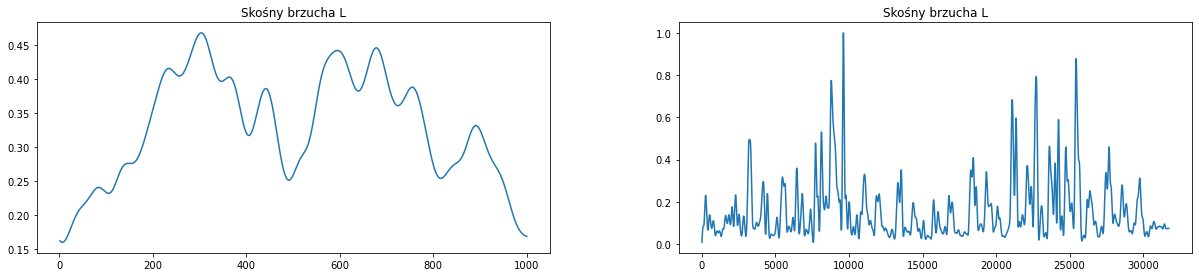

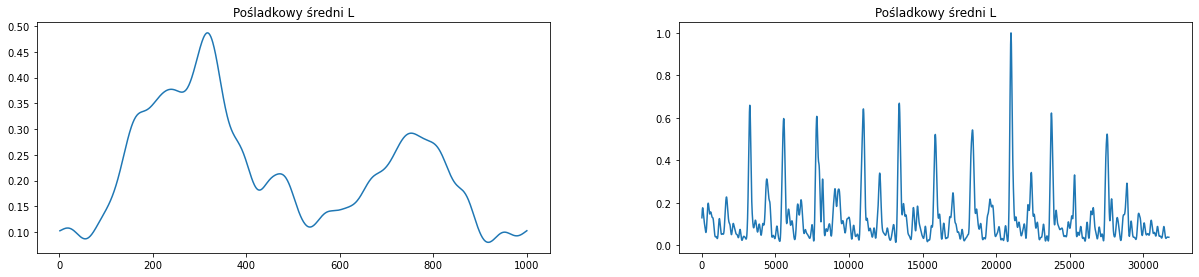

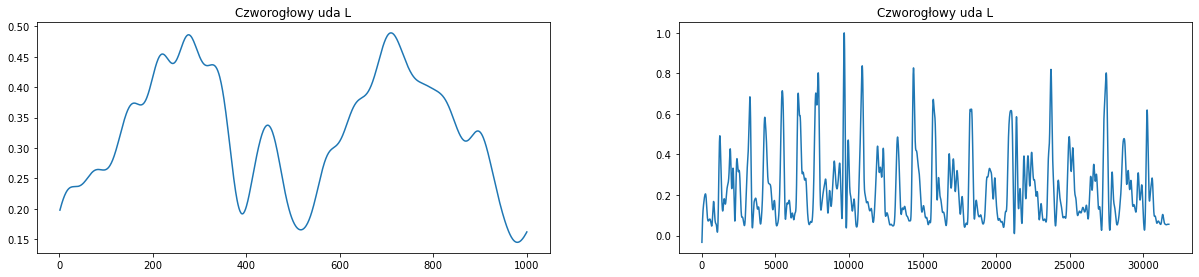

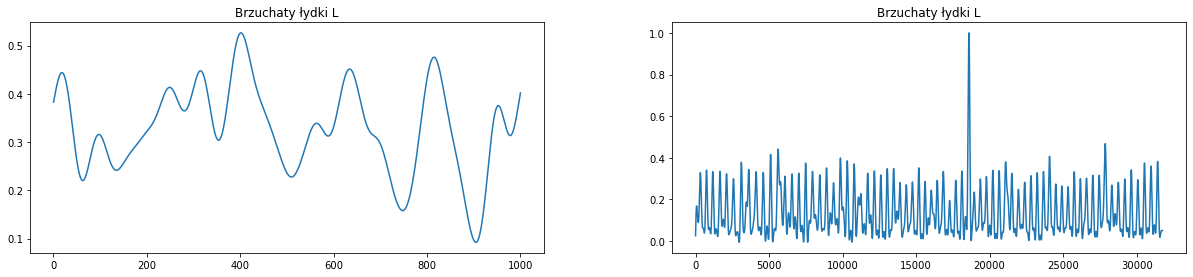

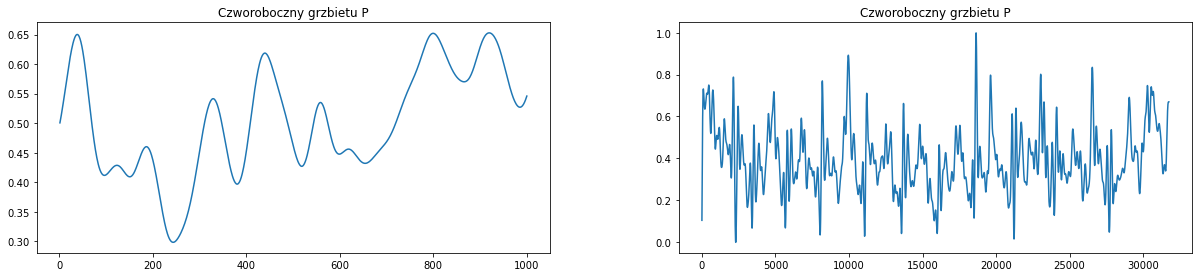

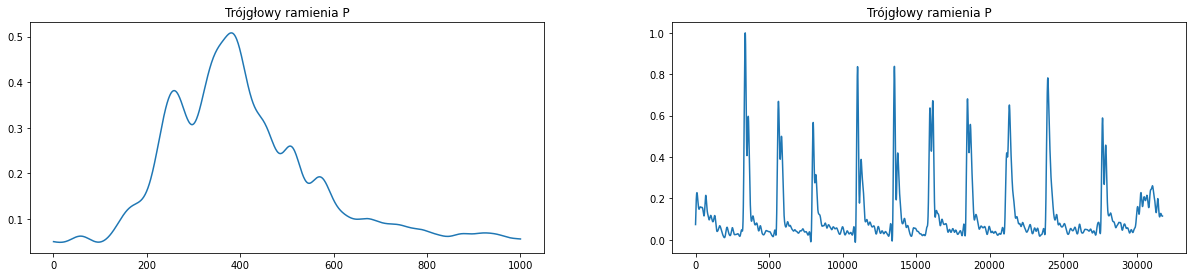

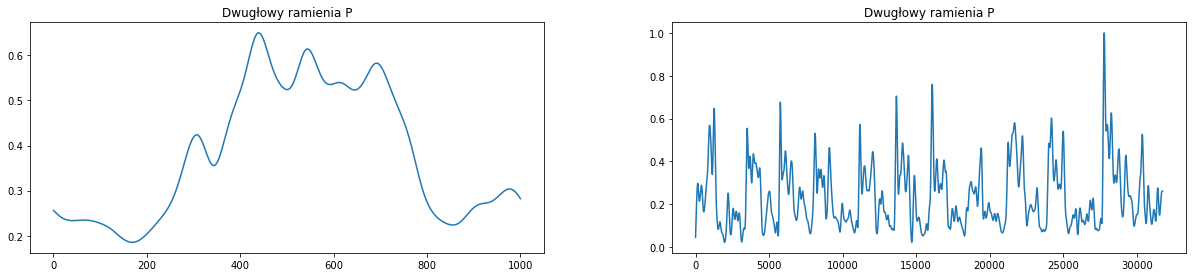

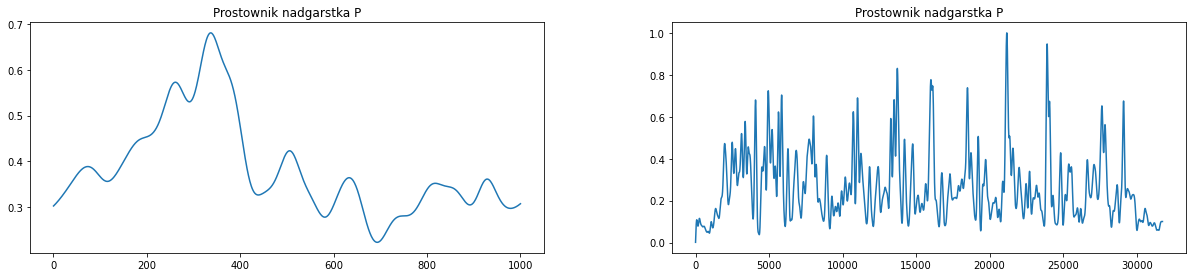

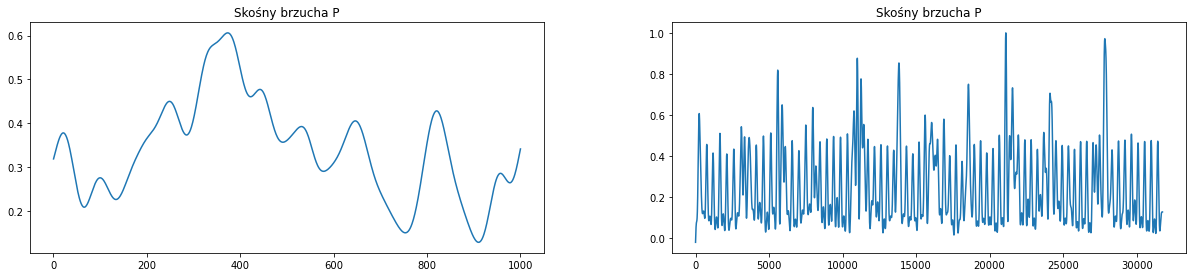

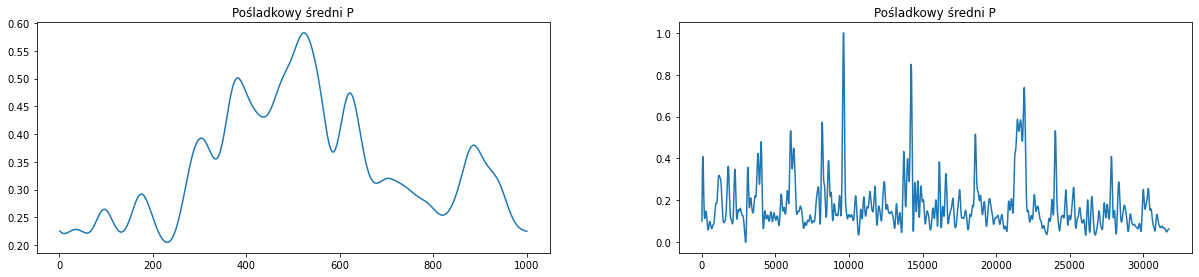

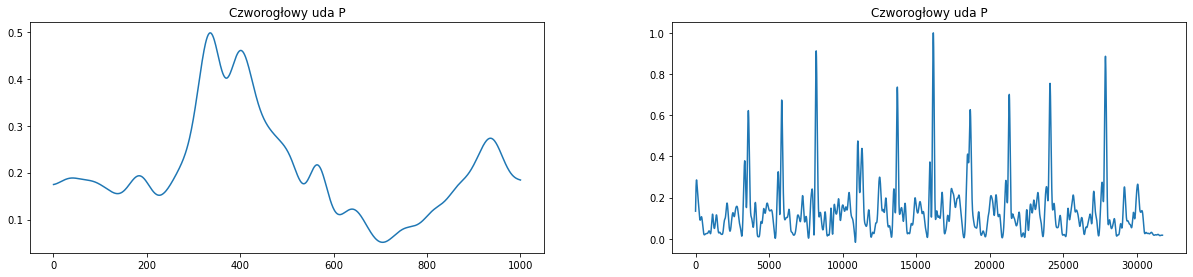

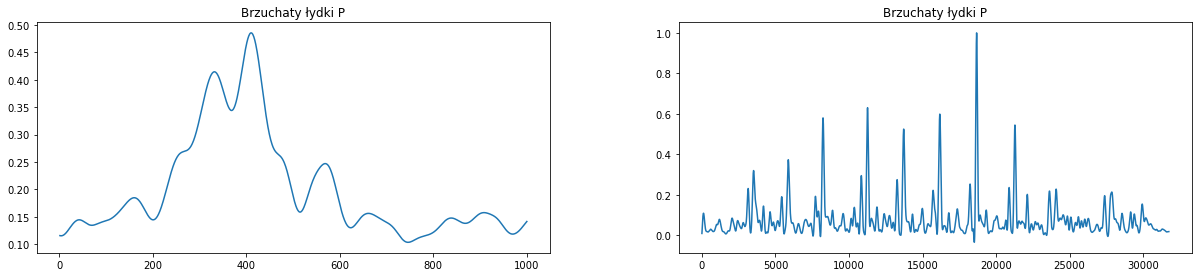

In [19]:
#show_events(path)
#show_events_norm(path)
show_events_average(path,processed)



In [18]:
#show_events_norm(path2,processed2)
#show_events_average(path2,processed2)


In [70]:
import glob

def compare_events_average(folder_path, person, exer_num):
    
    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr_all=np.zeros((16,1000))     
    
    for file in glob.glob(path,recursive = True):
        print(file)
        emg_processed=normalize_data(file)

        aver_arr=np.zeros((16,1000))  
        file_num=0

        p,d=dp.read_labels(file, 1000)
        for num in range(16):
            #aver_arr.append([])
            #subplot(1, 1, 1)
#             plt.subplots_adjust(left=0.125,
#                         bottom=0.1, 
#                         right=2.8, 
#                         top=0.9, 
#                         wspace=0.25, 
#                         hspace=0.35)
            for i in range(len(p)):


                emg_processed_event=emg_processed[num][p[i]:d[i]]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
    #             plt.plot(time_normalized)     
    #             plt.title(muscles_names2[num])
                for t in range(1000):
                    aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]

            aver_arr[num]=aver_arr[num]/10
            time=np.linspace(1,1000,1000)
            #plt.plot(time,aver_arr[num])     
            #plt.title(muscles_names2[num])


#             subplot(1, 2, 2)
#             plt.plot(emg_processed[num])
#             plt.title(muscles_names2[num])
#             plt.show()
            for t2 in range(1000):
                aver_arr_all[file_num][t2]=aver_arr_all[file_num][t2]+time_normalized.values[t2]
            file_num=file_num+1;
        
    
    for num in range(16):
        subplot(1, 1, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.7, 
                    wspace=0.25, 
                    hspace=0.35)
        aver_arr_all[num]=aver_arr_all[num]/5
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names2[num])
        plt.show()
    #print(aver_arr)

Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T01.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T02.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T03.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T04.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T05.c3d


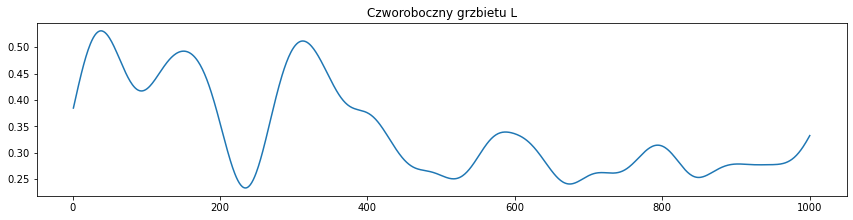

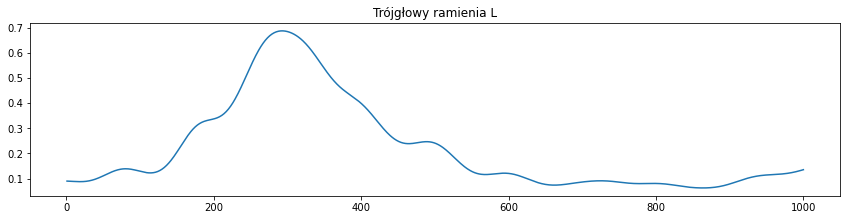

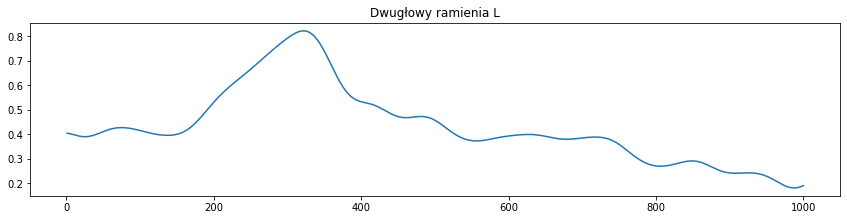

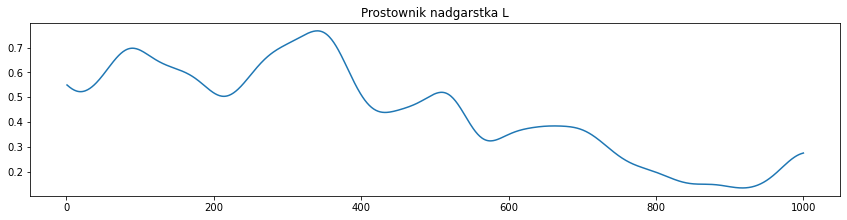

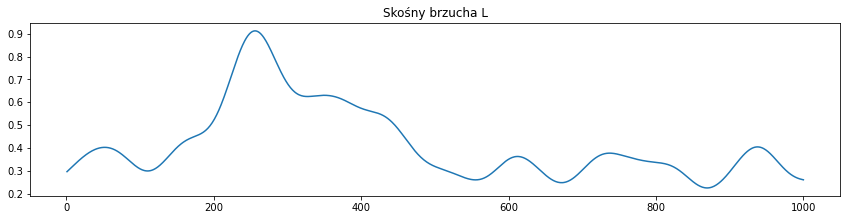

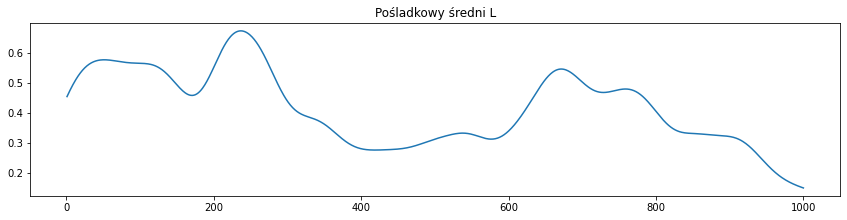

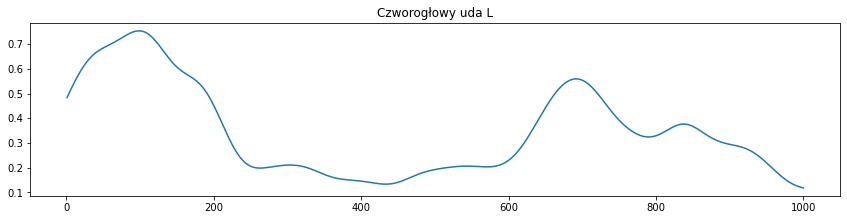

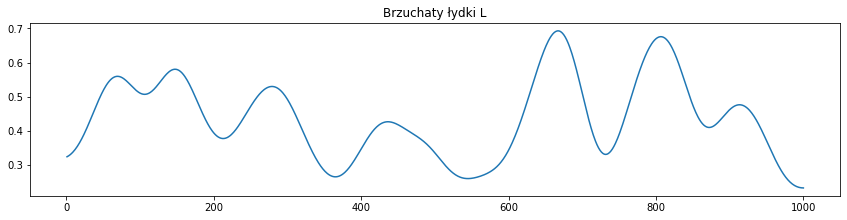

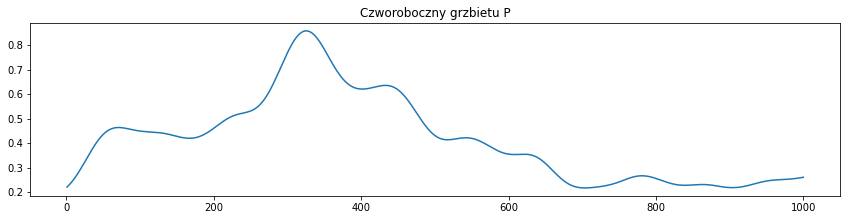

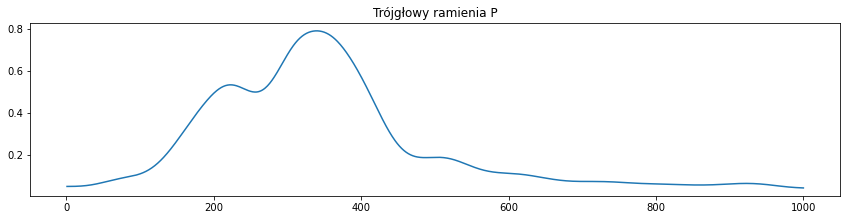

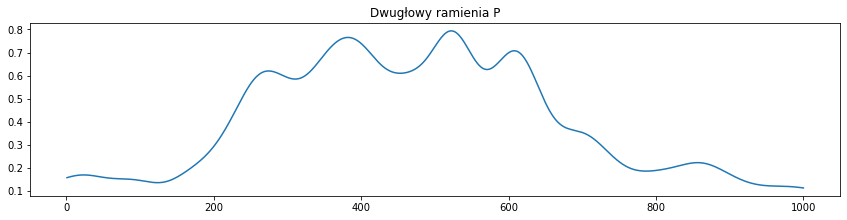

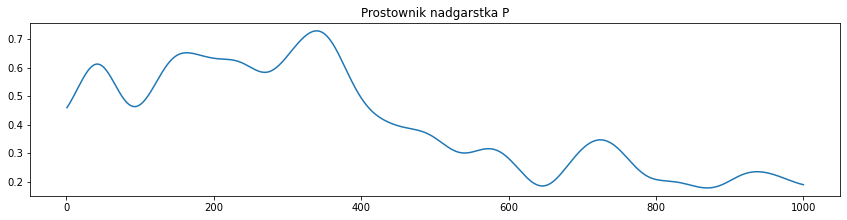

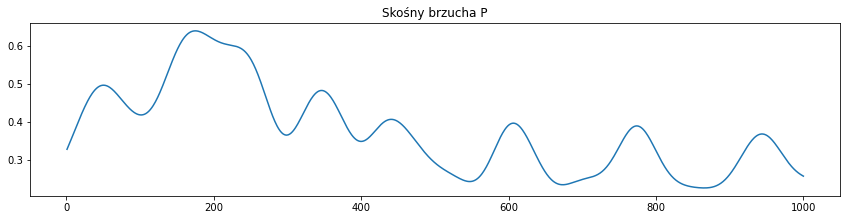

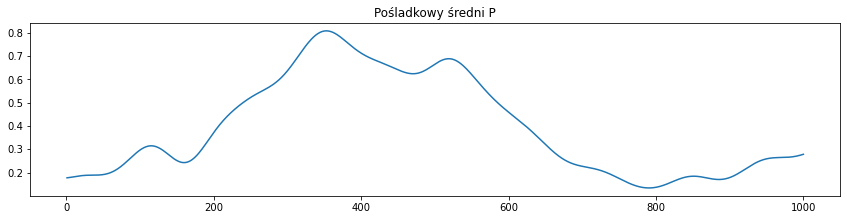

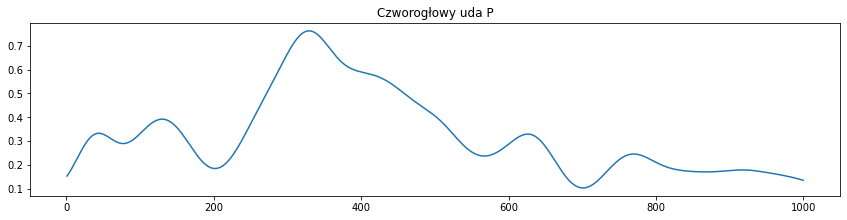

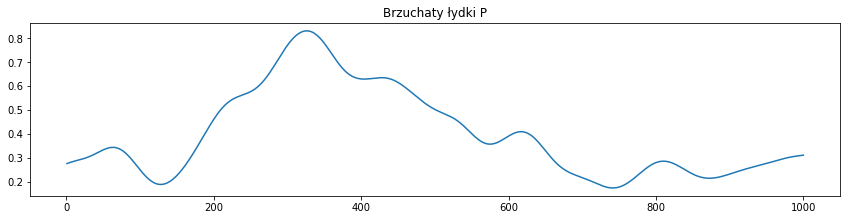

In [71]:
folder_path=r"C:\Users\gmultimedia.PJATK8\Desktop\PJATK_K\Dane\\"
folder_path2=r"Z:\Miecz\\"
compare_events_average(folder_path2,"B0445", "1")